# IST652 Project Deliverable 2 

## Phase 2: Project Progress

In this step you should have a road map of the steps you will be taking to complete your analysis. In addition, at this stage you should also complete the following 
- fine tune your research questions. 
- upload your dataset into jupyterhub and conduct some preliminary cleaning and transformation.
- provide coding activities conducted so far.
- have a better sense of team members responsibilities. 
- set a schedule to meet 



## Step 1: What is Your Idea and Research Questions, Again?

Please reiterate your project idea below (you can copy it from the project proposal if there were no changes).

`--== Double-click and put the title team members and brief description of your project below  ==--`

Team:
Austin
Chandan
Sinduri
Uday

### Project Summary: Analysis of World Bank Loan Data
#### Objective
The primary objective of this project is to conduct a comprehensive analysis of World Bank loan data to gain insights into global financial aid distribution, loan performance, and economic impacts on borrowing countries. The objective of this study is to find trends, patterns, and correlations in the dataset, which can give economists, development organizations, and policymakers useful information.

#### Research Questions
1.  What is the distribution of loan amounts across different countries?
2. What types of loans are most commonly issued by the World Bank and the average allocation of loan amounts to different loan types? Also, distribution of Loan amounts for Top 20 projects in South Asain countries.
3. Which countries repay their loans the slowest and the fastest?
4. What is the average amount of money borrowed for each sector,how are loan funds distributed among different industries in different countries and what three major factors are considered while lending a loan?
5.  Do the interest rates exhibit any obvious trends based on the borrowers’ geographic locations?








## Step 2: Problem Analysis - Roadmap

What are the preliminary major steps you will be completing? Include the research question and steps taken to answer that question? Are there any unique functions you will be incorporating which we have not covered in the classroom? Describe below.

`--== Double-click and describe steps towards analysis of your project below  ==--`  
    
We completed the data preprocessing and analyzed the data separetely for each research question.

1.
2. Identified top loan types issued by the World bank and studied the distribution of loan amount across loan types and distribution of loan amounts across top 20 projects in South Asian countries. Used bar graph and box plots.
3. Identified the positive correlations between loan duration and loan amount, highlighting the 5 countries with the shortest repayment periods and the 5 countries with the longest repayment periods. Used scatter plots and regression models.
4. Found out the average amount of money borrowed for each sector for all the countries and displayed the loan distribution for each sector based on Original Principal Amount, Repaid Amount, Remaining Due Amount. Further found the high performing sectors and low performing sectors。
5. Studied distribution of interest rates for countries that owed more than 1 billion to the world bank. Used box plot.


## Step 3: Preliminary Code

Include coding that has been completed at this preliminary stage.  

### Loading the data and pre processing

In [1]:
# load all necessary libiraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import geopandas as gpd

np.set_printoptions(precision=2, suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # disable scientific notation

In [2]:
!pip show geopandas

Name: geopandas
Version: 0.14.2
Summary: Geographic pandas extensions
Home-page: 
Author: 
Author-email: Kelsey Jordahl <kjordahl@alum.mit.edu>
License: BSD 3-Clause
Location: /opt/conda/lib/python3.11/site-packages
Requires: fiona, packaging, pandas, pyproj, shapely
Required-by: 


In [3]:
#Load the dataset
df = pd.read_csv("dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9163 entries, 0 to 9162
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        9163 non-null   object 
 1   Loan Number                   9163 non-null   object 
 2   Country Code                  9160 non-null   object 
 3   End of Period                 9163 non-null   object 
 4   Country                       9163 non-null   object 
 5   Borrower                      9106 non-null   object 
 6   Guarantor Country Code        8880 non-null   object 
 7   Guarantor                     8883 non-null   object 
 8   Loan Type                     9163 non-null   object 
 9   Loan Status                   9163 non-null   object 
 10  Interest Rate                 9064 non-null   float64
 11  Currency of Commitment        0 non-null      float64
 12  Project ID                    9163 non-null   object 
 13  Pro

In [4]:
## Columns to drop

# 1 'End of Period' is the same date, we can add a legend to show it, but we don't need this col
# 6 'Guarantor Country Code' & 7  'Guarantor':  All guantantors for borrowers (entities) are their countries, so it's useless
# 11'Currency of Commitment': all null values

df = df.drop(['End of Period','Guarantor Country Code','Guarantor','Currency of Commitment'],axis = 1)
## drop duplicated loan number or project ids
df = df.drop_duplicates(subset=['Loan Number', 'Project ID']) # duplicated row doesn't exist

In [5]:
print(df.shape)
# drop if Loan Number or Project ID is null
df.dropna(subset=['Loan Number', 'Project ID'])

(9163, 29)


,Region,Loan Number,Country Code,Country,Borrower,Loan Type,Loan Status,Interest Rate,Project ID,Project Name,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,EUROPE AND CENTRAL ASIA,IBRD00010,FR,France,CREDIT NATIONAL,NPL,Fully Repaid,4.25,P037383,RECONSTRUCTION,...,249962000.00,0,0.00,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
1,EUROPE AND CENTRAL ASIA,IBRD00020,NL,Netherlands,NaN,NPL,Fully Repaid,4.25,P037452,RECONSTRUCTION,...,87672000.00,0,0.00,04/01/1952 12:00:00 AM,10/01/1972 12:00:00 AM,08/07/1947 12:00:00 AM,08/07/1947 12:00:00 AM,09/11/1947 12:00:00 AM,03/31/1948 12:00:00 AM,NaN
2,EUROPE AND CENTRAL ASIA,IBRD00021,NL,Netherlands,NaN,NPL,Fully Repaid,4.25,P037452,RECONSTRUCTION,...,3955788.25,0,0.00,04/01/1953 12:00:00 AM,04/01/1954 12:00:00 AM,05/25/1948 12:00:00 AM,08/07/1947 12:00:00 AM,06/01/1948 12:00:00 AM,06/30/1948 12:00:00 AM,NaN
3,EUROPE AND CENTRAL ASIA,IBRD00030,DK,Denmark,NaN,NPL,Fully Repaid,4.25,P037362,RECONSTRUCTION,...,22229000.00,0,0.00,02/01/1953 12:00:00 AM,08/01/1972 12:00:00 AM,08/22/1947 12:00:00 AM,08/22/1947 12:00:00 AM,10/17/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
4,EUROPE AND CENTRAL ASIA,IBRD00040,LU,Luxembourg,NaN,NPL,Fully Repaid,4.25,P037451,RECONSTRUCTION,...,10142000.00,0,0.00,07/15/1949 12:00:00 AM,07/15/1972 12:00:00 AM,08/28/1947 12:00:00 AM,08/28/1947 12:00:00 AM,10/24/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9158,MIDDLE EAST AND NORTH AFRICA,IBRDS0160,DZ,Algeria,MINISTERE DES FINANCES,NPL,Fully Cancelled,0.00,P004894,SN METAL TECHNICAL ASST,...,0.00,0,0.00,05/15/1984 12:00:00 AM,11/15/1989 12:00:00 AM,NaN,11/13/1979 12:00:00 AM,11/13/1979 12:00:00 AM,06/30/1983 12:00:00 AM,NaN
9159,MIDDLE EAST AND NORTH AFRICA,IBRDS0170,DZ,Algeria,MINISTERE DES FINANCES,NPL,Fully Repaid,7.95,P004895,WATER SUP & ENG.,...,0.00,0,0.00,11/15/1983 12:00:00 AM,11/15/1989 12:00:00 AM,02/14/1980 12:00:00 AM,01/15/1980 12:00:00 AM,09/17/1980 12:00:00 AM,12/31/1984 12:00:00 AM,11/13/1985 12:00:00 AM
9160,MIDDLE EAST AND NORTH AFRICA,IBRDS0180,MA,Morocco,ONAREP,NPL,Fully Repaid,8.25,P005392,PETROLEUM EXPLORATION I,...,0.00,0,0.00,11/01/1984 12:00:00 AM,05/01/1997 12:00:00 AM,05/19/1980 12:00:00 AM,04/15/1980 12:00:00 AM,10/24/1980 12:00:00 AM,06/30/1984 12:00:00 AM,NaN
9161,LATIN AMERICA AND CARIBBEAN,IBRDS0190,PE,Peru,EMPRESA SIDERURGICA DEL PERU,NPL,Fully Repaid,8.25,P007969,SIDERPERU TA,...,0.00,0,0.00,12/15/1984 12:00:00 AM,12/15/1990 12:00:00 AM,12/15/1980 12:00:00 AM,07/15/1980 12:00:00 AM,04/16/1981 12:00:00 AM,06/30/1986 12:00:00 AM,10/11/1983 12:00:00 AM


In [6]:
## Convert datatype

# convert datetime data
date_list = ['First Repayment Date','Last Repayment Date','Agreement Signing Date','Board Approval Date',
             'Effective Date (Most Recent)','Closed Date (Most Recent)','Last Disbursement Date']
for x in date_list:
    df[x] = pd.to_datetime(df[x], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9163 entries, 0 to 9162
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Region                        9163 non-null   object        
 1   Loan Number                   9163 non-null   object        
 2   Country Code                  9160 non-null   object        
 3   Country                       9163 non-null   object        
 4   Borrower                      9106 non-null   object        
 5   Loan Type                     9163 non-null   object        
 6   Loan Status                   9163 non-null   object        
 7   Interest Rate                 9064 non-null   float64       
 8   Project ID                    9163 non-null   object        
 9   Project Name                  9163 non-null   object        
 10  Original Principal Amount     9163 non-null   float64       
 11  Cancelled Amount              


### Research Questions 


#### 1.  What is the distribution of loan amounts across different countries?

In [7]:
# Group by 'Country' and sum up 'Original Principal Amount'
country_loan_totals = df.groupby('Country')['Original Principal Amount'].sum().reset_index()

# Calculate total loan amount
total_loan_amount = country_loan_totals['Original Principal Amount'].sum()

# Calculate percentage share
country_loan_totals['Percentage_Share'] = (country_loan_totals['Original Principal Amount'] / total_loan_amount) * 100
country_loan_totals

,Country,Original Principal Amount,Percentage_Share
0,Albania,2112160000.00,0.24
1,Algeria,5911830000.00,0.67
2,Angola,6557000000.00,0.74
3,Antigua and Barbuda,12000000.00,0.00
4,Argentina,42466653000.00,4.79
...,...,...,...
142,Viet Nam,3818153000.00,0.43
143,Western and Central Africa,93600000.00,0.01
144,"Yugoslavia, former",1625943610.68,0.18
145,Zambia,635350000.00,0.07


In [8]:
# Sort by 'Percentage Share' in descending order
country_loan_totals = country_loan_totals.sort_values(by='Percentage_Share', ascending=False)
country_loan_totals

,Country,Original Principal Amount,Percentage_Share
60,India,80608560000.00,9.09
61,Indonesia,67343978591.00,7.60
18,Brazil,66470532492.00,7.50
86,Mexico,60570150464.69,6.83
26,China,58495647142.81,6.60
...,...,...,...
36,Dominica,7760000.00,0.00
83,Malta,7500000.00,0.00
20,Burundi,4800000.00,0.00
132,Togo,3500000.00,0.00


In [9]:
# Focus on top countries (top 10)
top_countries = country_loan_totals.head(10)
top_countries.drop(columns=["Original Principal Amount"], inplace=True)
top_countries.reset_index(inplace=True, drop = True)
top_countries

/tmp/ipykernel_4010/2974546815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries.drop(columns=["Original Principal Amount"], inplace=True)


,Country,Percentage_Share
0,India,9.09
1,Indonesia,7.60
2,Brazil,7.50
3,Mexico,6.83
4,China,6.60
5,Turkiye,6.00
6,Argentina,4.79
7,Colombia,3.86
8,Philippines,3.34
9,Morocco,2.93


/tmp/ipykernel_4010/3500760096.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/tmp/ipykernel_4010/3500760096.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.centroid


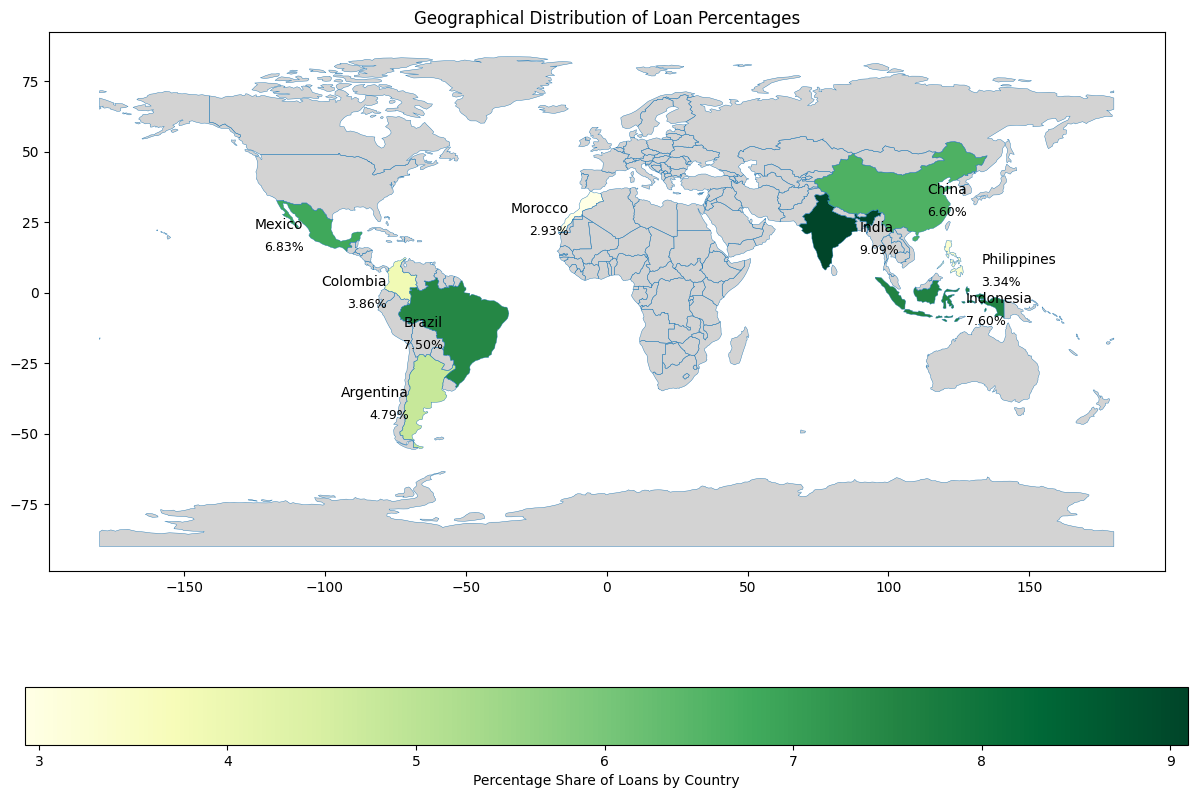

In [10]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge your data with the world map
world = world.merge(top_countries, how="left", left_on="name", right_on="Country")

# Calculate centroids for labeling
world['centroid'] = world.centroid

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.3)
base = world.plot(column='Percentage_Share', ax=ax, legend=True,
           legend_kwds={'label': "Percentage Share of Loans by Country",
                        'orientation': "horizontal"},
           missing_kwds={'color': 'lightgrey'},
           cmap='YlGn')

for idx, row in world.iterrows():
    if pd.notna(row['Percentage_Share']):
        offset = 10 if row['centroid'].x > 0 else -5
        # Annotate country name beside the centroid
        ax.annotate(text=row['name'], xy=(row['centroid'].x + offset, row['centroid'].y),
                    horizontalalignment='left' if offset > 0 else 'right', verticalalignment='center')
        # Annotate percentage share beside the country name
        ax.annotate(text=f"{row['Percentage_Share']:.2f}%", xy=(row['centroid'].x + offset, row['centroid'].y - 8),
                    horizontalalignment='left' if offset > 0 else 'right', verticalalignment='center', fontsize=9, color='black')

plt.title('Geographical Distribution of Loan Percentages')
plt.show()

### The above plot displays the geographical map of countries and highlights the top 10 countries by the percentage share of loans in the dataset. We can see the color pallette denoting the percentage ranges in the plot. In the available dataset, India has the highest share of loans, followed by Indinesia.

 #### 2. What types of loans are most commonly issued by the World Bank and the average allocation of loan amounts to different loan types? Also, distribution of Loan amounts for Top 20 projects in South Asain countries.

In [11]:
# Top Loan types issued by World Bank
Loan_types = df['Loan Type'].value_counts()
print(Loan_types)
Top_Loan_types= Loan_types.head(5)
print(Top_Loan_types)


Loan Type
FSL     2575
CPL     2345
NPL     2013
SCL     1255
SCPD     691
SCPM     172
GURB      72
BLNR      18
SCPY      13
GUBF       7
BLNC       2
Name: count, dtype: int64
Loan Type
FSL     2575
CPL     2345
NPL     2013
SCL     1255
SCPD     691
Name: count, dtype: int64


**FSL -fixed spread loan(interest rate is composed of a fixed spread over a base rate),CPL-consumer personal loan(type of loan that supports programs aimed at improving access to personal finance or consumer credit within member countries),NPL-non performing loan(borrower has not made scheduled payments for a specified period, typically 90 days or more. "all are cancelled or repaid"),SCL - secured loan,SCPD- Secured Payday Loan -reuires collateral**

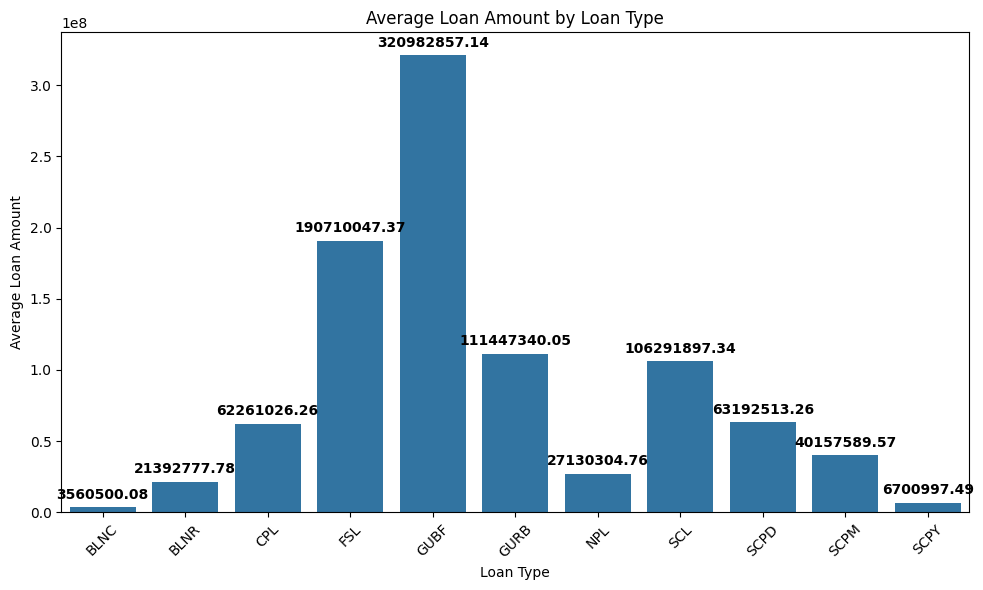

In [12]:
# Plot avg loan amount vs loan types
import warnings
import numpy as np

# Suppress numpy warnings temporarily
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Your calculation code here
# For example:
# c *= np.true_divide(1, fact)

# Restore warnings to default behavior
warnings.resetwarnings()

# Clean the data and select relevant columns
relevant_columns = ['Loan Type', 'Original Principal Amount']
cleaned_data = df[relevant_columns].dropna()

# Convert Loan Amount to numeric if it's not already
cleaned_data['Original Principal Amount'] = pd.to_numeric(cleaned_data['Original Principal Amount'], errors='coerce')

# Group by Project Type and calculate average Loan Amount
avg_loan_amount_by_type = cleaned_data.groupby('Loan Type')['Original Principal Amount'].mean().reset_index()
# Identify top 5 loan types by amount
top_5_loans = avg_loan_amount_by_type.nlargest(5,'Original Principal Amount')

# Plotting using seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Loan Type', y='Original Principal Amount', data=avg_loan_amount_by_type)
plt.title('Average Loan Amount by Loan Type')
plt.xticks(rotation=45)
plt.ylabel('Average Loan Amount')
plt.xlabel('Loan Type')
# Adding values on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=10, color='black', weight='bold')



plt.tight_layout()
plt.show()




Index(['FINANCIAL SECTOR DEV PROJ. (FSDP)', 'RAILWAY', '*DUMMY FOR * PAKISTAN',
       'ELECTRONICS', 'TELECOMMUNICATIONS V', 'NTPC POWER GENERATION',
       'PK: HIGHWAYS REHAB', 'PETROCHEMICALS', 'Sri Lanka COVID-19 ERHSP',
       'INDUS POLLUTION PREVENTION', 'POWER', 'INDIAN IRON & STEEL',
       'IND. FINANCE I', 'POWER UTIL EFFIC IMP',
       'Grid-Connected Rooftop Solar Program', 'AGR.DEV.I (TN)',
       'IND POLLUTION CONTROL', 'GOAL', 'Resilient Kerala PforR',
       'NAT. HIGHWAYS II'],
      dtype='object', name='Project Name')


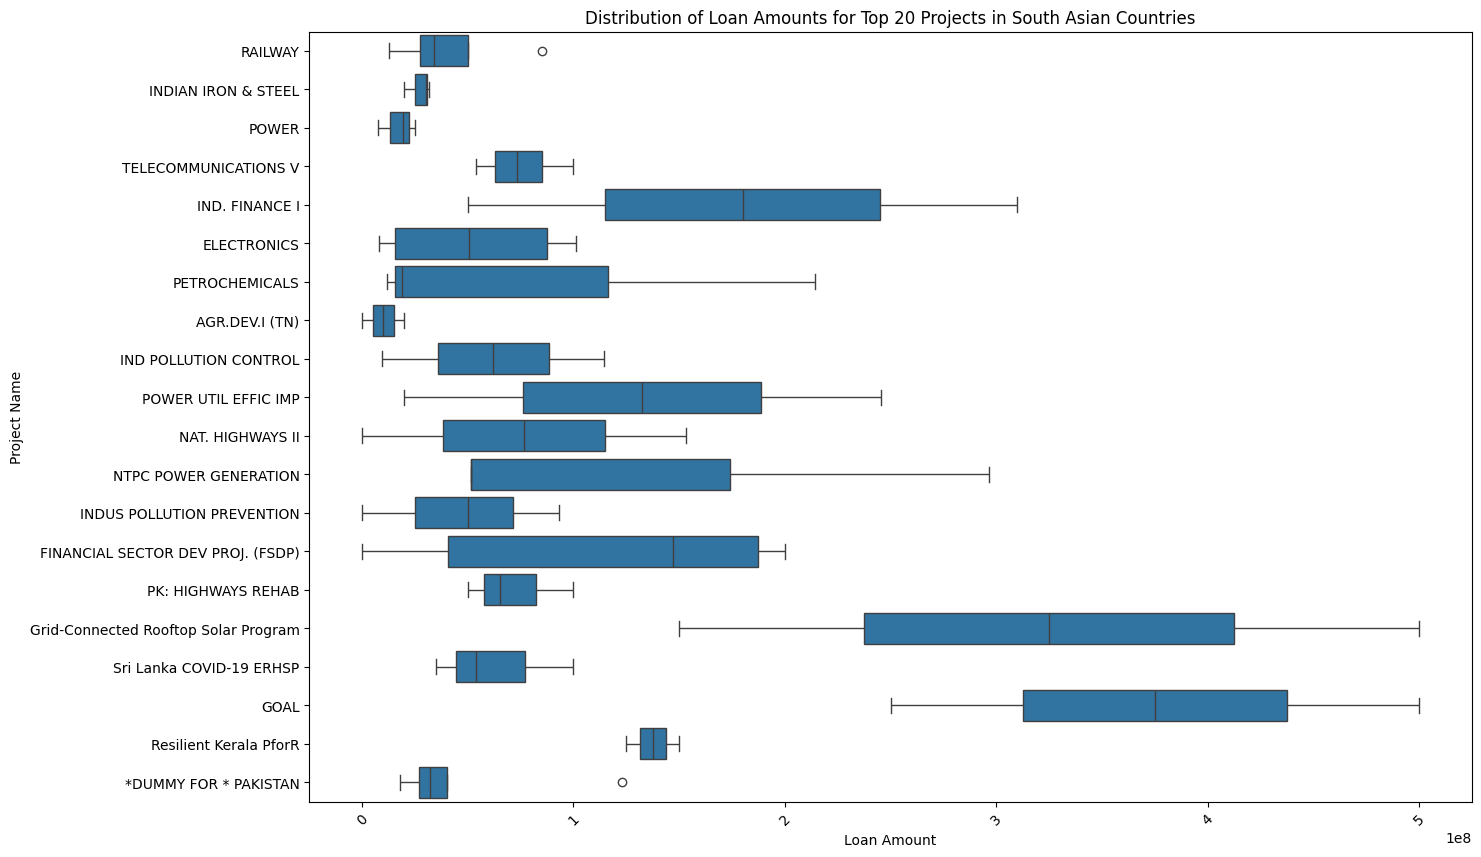

In [13]:
#Distribution of Loan Amounts for Top 20 Projects in South Asian Countries
sa_df= df[df['Region']=='SOUTH ASIA']
sa_df.head()
# For better visualization, limit to the top 20 project names by number of entries
top_projects = sa_df['Project Name'].value_counts().head(20).index
df_top_projects = sa_df[sa_df['Project Name'].isin(top_projects)]
print(top_projects)
# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_top_projects, x='Original Principal Amount', y='Project Name')
plt.title('Distribution of Loan Amounts for Top 20 Projects in South Asian Countries')
plt.xlabel('Loan Amount')
plt.ylabel('Project Name')
plt.xticks(rotation=45)
plt.show()

#x-axis - 10^8 or 100 million


#### 3. Which countries repay their loans the slowest and the fastest?

In [14]:
# Calculate Loan Duration
df['Loan Duration'] = df['Last Repayment Date'] - df['Effective Date (Most Recent)']

df['Loan Duration'] =df['Loan Duration'].dt.days

# Payment duration
df['Payment Duration'] = df['Last Repayment Date'] - df['First Repayment Date']
df['Payment Duration'] = df['Payment Duration'].dt.days


In [15]:
# group by country
country_df = df.groupby('Country')
# mean of each country
country_payment_d = country_df['Payment Duration'].mean()

# convert series to df for sns to read
country_payment_d =country_payment_d.reset_index()
country_payment_d.columns = ['Country','Pay_dur']
country_payment_d

,Country,Pay_dur
0,Albania,5204.92
1,Algeria,3705.34
2,Angola,6311.52
3,Antigua and Barbuda,7762.00
4,Argentina,4855.15
...,...,...
142,Viet Nam,6487.74
143,Western and Central Africa,4749.00
144,"Yugoslavia, former",4549.50
145,Zambia,5062.06


In [16]:
# mean of each country
country_loan_d = country_df['Loan Duration'].mean()

# convert series to df for sns to read
country_loan_d =country_loan_d.reset_index()
country_loan_d.columns = ['Country','Loan_dur']
country_loan_d

,Country,Loan_dur
0,Albania,7388.94
1,Algeria,5629.89
2,Angola,8234.60
3,Antigua and Barbuda,9743.00
4,Argentina,6730.07
...,...,...
142,Viet Nam,9306.88
143,Western and Central Africa,6155.50
144,"Yugoslavia, former",5839.93
145,Zambia,7379.75


In [17]:
# the total loan of a country is the repaid amount plus the amount sold to third party
repaid_by_c = country_df['Repaid to IBRD'].sum()
third_party_by_c = country_df['Sold 3rd Party'].sum()
total_loans_by_c = repaid_by_c+ third_party_by_c

# convert to df, use billion as unit
total_loans_by_c= total_loans_by_c.reset_index()
total_loans_by_c.columns =  ['Country','Loan']
total_loans_by_c['Loan'] = total_loans_by_c['Loan']/ 1000000000

total_loans_by_c

,Country,Loan
0,Albania,0.17
1,Algeria,4.31
2,Angola,0.03
3,Antigua and Barbuda,0.00
4,Argentina,23.75
...,...,...
142,Viet Nam,0.35
143,Western and Central Africa,0.09
144,"Yugoslavia, former",0.57
145,Zambia,0.58


In [18]:
# filter out countries owed more than 1 billion
oneb_country = total_loans_by_c[total_loans_by_c['Loan']> 1]
merge_df = pd.merge(country_loan_d, oneb_country, on='Country', how='right')
merge_df = pd.merge(merge_df, country_payment_d, on='Country', how='left')
merge_df = pd.merge(merge_df, df[['Country','Region']], on='Country', how='left').drop_duplicates()
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 7391
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   47 non-null     object 
 1   Loan_dur  47 non-null     float64
 2   Loan      47 non-null     float64
 3   Pay_dur   47 non-null     float64
 4   Region    47 non-null     object 
dtypes: float64(3), object(2)
memory usage: 2.2+ KB


In [19]:
!pip install adjustText

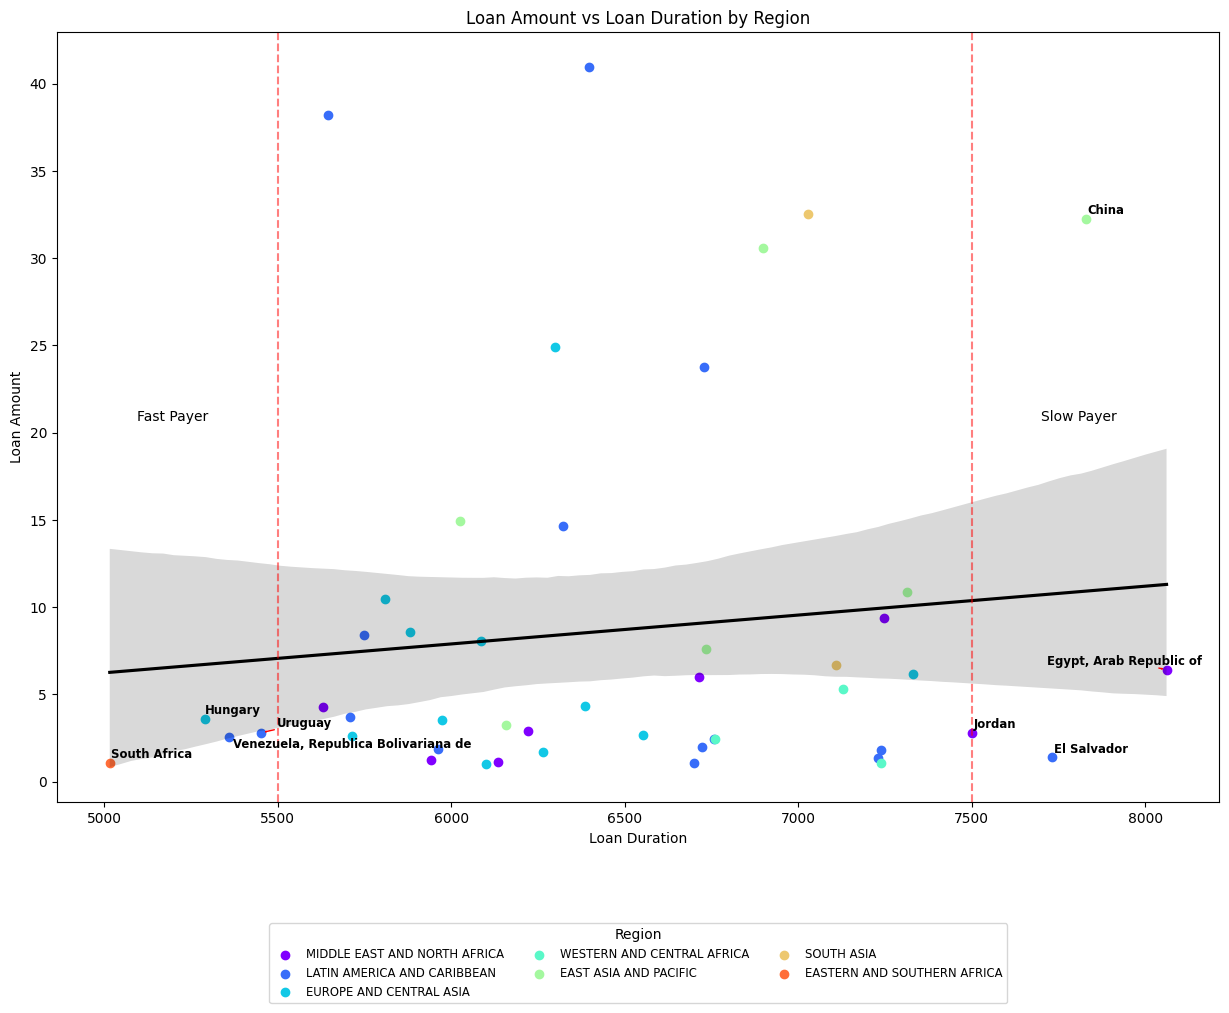

In [20]:
import adjustText

# Get unique Region value
unique_regions = merge_df['Region'].unique()

# Create a discrete color mapping
color_map = plt.colormaps.get_cmap('rainbow')   # use rainbow colors
colors = {region: color_map(i / len(unique_regions)) for i, region in enumerate(unique_regions)} # create color mapping for each scatter, grouped by regions

plt.figure(figsize=(15, 10))

# Plot scatter for each Region
for region in unique_regions:
    data = merge_df[merge_df['Region'] == region]
    plt.scatter(data['Loan_dur'], data['Loan'], 
                c=[colors[region]], 
                label=region, 
                alpha=1)


# Add dashed lines and labels 
sns.regplot(data=merge_df, x='Loan_dur', y='Loan', 
            scatter=False, color='black')

# Add dashed lines and labels
plt.axvline(x=5500, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=7500, color='red', linestyle='--', alpha=0.5)

# Calculate the midpoint of the y-axis to place the labels
y_min, y_max = plt.ylim()
y_mid = (y_min + y_max) / 2

plt.text(5300, y_mid, 'Fast Payer', va='center', ha='right')
plt.text(7700, y_mid, 'Slow Payer', va='center', ha='left')


plt.title('Loan Amount vs Loan Duration by Region')
plt.xlabel('Loan Duration')
plt.ylabel('Loan Amount')

# put legend at the bottom to save space
plt.legend(title='Region', loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=3, fontsize='small')

# Add text annotations for slow and fast payers
texts = []
for idx, row in merge_df.iterrows():
    if row['Loan_dur'] > 7500 or row['Loan_dur'] < 5500:
         texts.append(plt.text(row['Loan_dur'], row['Loan'], row['Country'], 
                               horizontalalignment='left', 
                               size='small', color='black', weight='semibold'))
adjustText.adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red')) # adjust spaces between texts to avoid overlapping

plt.show()

#### 4. What is the average amount of money borrowed for each sector,how are loan funds distributed among different industries in different countries and what three major factors are considered while lending a loan?


In [21]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
df.head()

# Check for missing values and handle them appropriately
df.isnull().sum()

# Drop columns with high missing values
df = df.drop(columns=['Currency of Commitment'])

# Fill missing values for categorical columns with mode
for col in ['Country Code', 'Borrower', 'Guarantor Country Code', 'Guarantor']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values for numerical columns with median
for col in ['Interest Rate']:
    df[col].fillna(df[col].median(), inplace=True)

# Convert date columns to datetime with specified format
date_columns = [
    'End of Period', 'First Repayment Date', 'Last Repayment Date',
    'Agreement Signing Date', 'Board Approval Date', 'Effective Date (Most Recent)',
    'Closed Date (Most Recent)', 'Last Disbursement Date'
]

date_format = '%m/%d/%Y %I:%M:%S %p'

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format=date_format, errors='coerce')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9163 entries, 0 to 9162
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Region                        9163 non-null   object        
 1   Loan Number                   9163 non-null   object        
 2   Country Code                  9163 non-null   object        
 3   End of Period                 9163 non-null   datetime64[ns]
 4   Country                       9163 non-null   object        
 5   Borrower                      9163 non-null   object        
 6   Guarantor Country Code        9163 non-null   object        
 7   Guarantor                     9163 non-null   object        
 8   Loan Type                     9163 non-null   object        
 9   Loan Status                   9163 non-null   object        
 10  Interest Rate                 9163 non-null   float64       
 11  Project ID                    

In [22]:
# Summary statistics for numerical columns
summary_stats = df.describe()
summary_stats


,End of Period,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrower's Obligation,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
count,9163,9163.00,9163.00,9163.00,9163.00,9163.00,9163.00,9163.00,9163.00,9163.00,...,9163.00,9163.00,9163.00,9116,9117,9003,9163,9060,9155,5610
mean,2024-05-31 00:00:00,4.02,96738364.92,11513676.32,9127252.59,76364416.84,46726359.09,29317375.23,-784899.88,28532475.35,...,401174.14,0.00,38444627.81,1999-02-15 15:44:28.012286080,2012-01-30 17:09:29.792695040,1993-03-15 10:34:59.300233216,1993-04-10 02:06:21.097893760,1993-07-28 02:28:46.092715136,1999-02-13 16:14:53.413435264,2006-09-23 10:20:39.786096128
min,2024-05-31 00:00:00,0.00,0.00,0.00,-0.01,0.00,0.00,-100507431.09,-1028356446.58,-0.03,...,0.00,0.00,-100507431.09,1949-01-15 00:00:00,1951-01-01 00:00:00,1947-05-09 00:00:00,1947-05-09 00:00:00,1947-06-09 00:00:00,1947-12-31 00:00:00,1983-10-11 00:00:00
25%,2024-05-31 00:00:00,0.00,13556566.80,0.00,0.00,7240109.71,2957492.30,0.00,0.00,0.00,...,0.00,0.00,0.00,1986-01-15 00:00:00,1999-08-15 00:00:00,1981-07-15 00:00:00,1981-05-13 00:00:00,1982-01-14 06:00:00,1987-06-30 00:00:00,1997-05-24 00:00:00
50%,2024-05-31 00:00:00,4.84,39200000.00,1315.93,0.00,25389814.49,16635671.58,0.00,0.00,0.00,...,0.00,0.00,0.00,1998-09-15 00:00:00,2009-12-15 00:00:00,1992-06-16 00:00:00,1992-06-02 00:00:00,1992-10-30 00:00:00,1998-12-31 00:00:00,2005-06-05 00:00:00
75%,2024-05-31 00:00:00,7.15,100000000.00,4110908.30,0.00,79938921.29,49294301.61,0.00,0.00,0.00,...,0.00,0.00,0.00,2011-11-15 00:00:00,2022-12-15 00:00:00,2006-03-14 00:00:00,2006-06-15 00:00:00,2006-05-16 00:00:00,2011-06-30 00:00:00,2017-01-12 00:00:00
max,2024-05-31 00:00:00,11.60,3750000000.00,1995000000.00,1509886000.00,3153530829.10,3000000000.00,2342830953.44,252134181.20,1503759398.00,...,249962000.00,0.00,2342830953.44,2043-11-15 00:00:00,2059-03-15 00:00:00,2024-05-27 00:00:00,2024-05-31 00:00:00,2025-01-01 00:00:00,2033-12-31 00:00:00,2024-06-05 00:00:00
std,NaN,3.44,168443315.15,49441016.44,49372644.26,152761447.80,98780978.75,111530684.27,15378585.14,106875854.29,...,3677905.21,0.00,123385308.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Calculate the average loan amount for each sector (Project Name)
average_loan_amount_per_sector = df.groupby('Project Name')['Original Principal Amount'].mean().reset_index()
average_loan_amount_per_sector.columns = ['Project Name', 'Average Loan Amount']

# Display the structured data for average loan amount per sector
print(average_loan_amount_per_sector.head(10))


                      Project Name  Average Loan Amount
0                   (DFC V) DIB IV          25000000.00
1        (LKD) HIGHWAY SECTOR LOAN         250000000.00
2                 (PIAUI)R.POVERTY          30000000.00
3  *DUMMY FOR * BOSNIA-HERZEGOVINA         216666666.67
4               *DUMMY FOR * CHINA          30361785.70
5            *DUMMY FOR * PAKISTAN          48000000.00
6         *DUMMY FOR * PHILIPPINES         100000000.00
7              *DUMMY FOR * RUSSIA         100000000.00
8             *DUMMY FOR * UKRAINE         100000000.00
9          *DUMMY FOR * YUGOSLAVIA         311206572.05


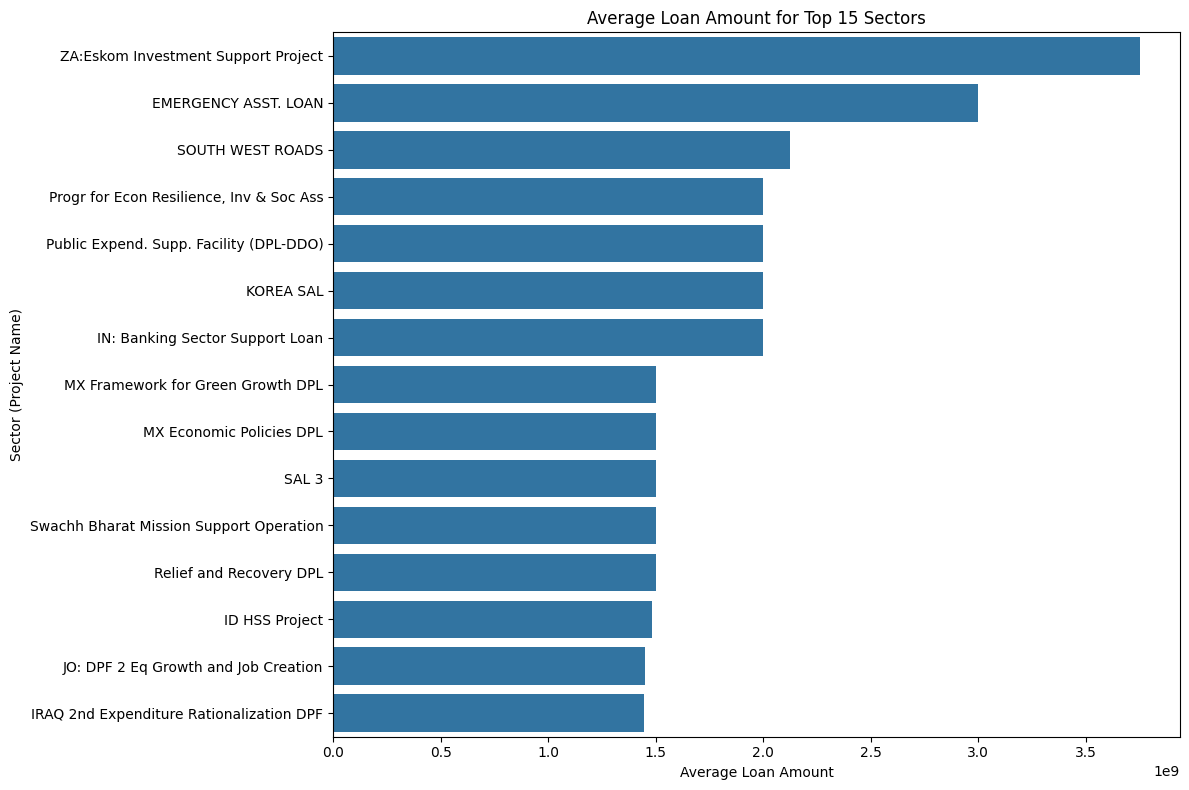

In [24]:
# Select the top 15 sectors by average loan amount
top_15_sectors = average_loan_amount_per_sector.sort_values(by='Average Loan Amount', ascending=False).head(15)

# Plotting the average loan amount for the top 15 sectors (Horizontal Bar Plot)
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Loan Amount', y='Project Name', data=top_15_sectors)
plt.title('Average Loan Amount for Top 15 Sectors')
plt.xlabel('Average Loan Amount')
plt.ylabel('Sector (Project Name)')
plt.tight_layout()
plt.show()


In [25]:
# Calculate the total loan amount for each sector in each country
total_loan_amount_per_sector_country = df.groupby(['Country', 'Project Name'])['Original Principal Amount'].sum().reset_index()
total_loan_amount_per_sector_country.columns = ['Country', 'Project Name', 'Total Loan Amount']

# Display the structured data
print(total_loan_amount_per_sector_country.head(10))

# Create a pivot table for the heatmap
pivot_table = total_loan_amount_per_sector_country.pivot_table(index='Country', columns='Project Name', values='Total Loan Amount')



   Country                              Project Name  Total Loan Amount
0  Albania            AL Busi Env Ref & Insti Streng         5600000.00
1  Albania                   AL Financial Sector DPL       200000000.00
2  Albania             Albania Bridge Rehabilitation        55000000.00
3  Albania               Albania Competitiveness DPL        70000000.00
4  Albania        Albania Emergency COVID-19 Project        16800000.00
5  Albania  Albania Fiscal Sustainability and Growth        80000000.00
6  Albania               Albania Gender Equality DPF        10000000.00
7  Albania         Albania Health System Improvement        69500000.00
8  Albania                Albania Public Finance PBG       226700000.00
9  Albania  Albania WSS Sector Modernization Program        75000000.00


In [26]:
# Calculate the total loan amount for each sector in each country
total_loan_amount_per_sector_country = df.groupby(['Country', 'Project Name'])['Original Principal Amount'].sum().reset_index()
total_loan_amount_per_sector_country.columns = ['Country', 'Project Name', 'Total Loan Amount']

# Display the structured data
print(total_loan_amount_per_sector_country.head(10))

# Create a pivot table for the heatmap
pivot_table = total_loan_amount_per_sector_country.pivot_table(index='Country', columns='Project Name', values='Total Loan Amount')



   Country                              Project Name  Total Loan Amount
0  Albania            AL Busi Env Ref & Insti Streng         5600000.00
1  Albania                   AL Financial Sector DPL       200000000.00
2  Albania             Albania Bridge Rehabilitation        55000000.00
3  Albania               Albania Competitiveness DPL        70000000.00
4  Albania        Albania Emergency COVID-19 Project        16800000.00
5  Albania  Albania Fiscal Sustainability and Growth        80000000.00
6  Albania               Albania Gender Equality DPF        10000000.00
7  Albania         Albania Health System Improvement        69500000.00
8  Albania                Albania Public Finance PBG       226700000.00
9  Albania  Albania WSS Sector Modernization Program        75000000.00


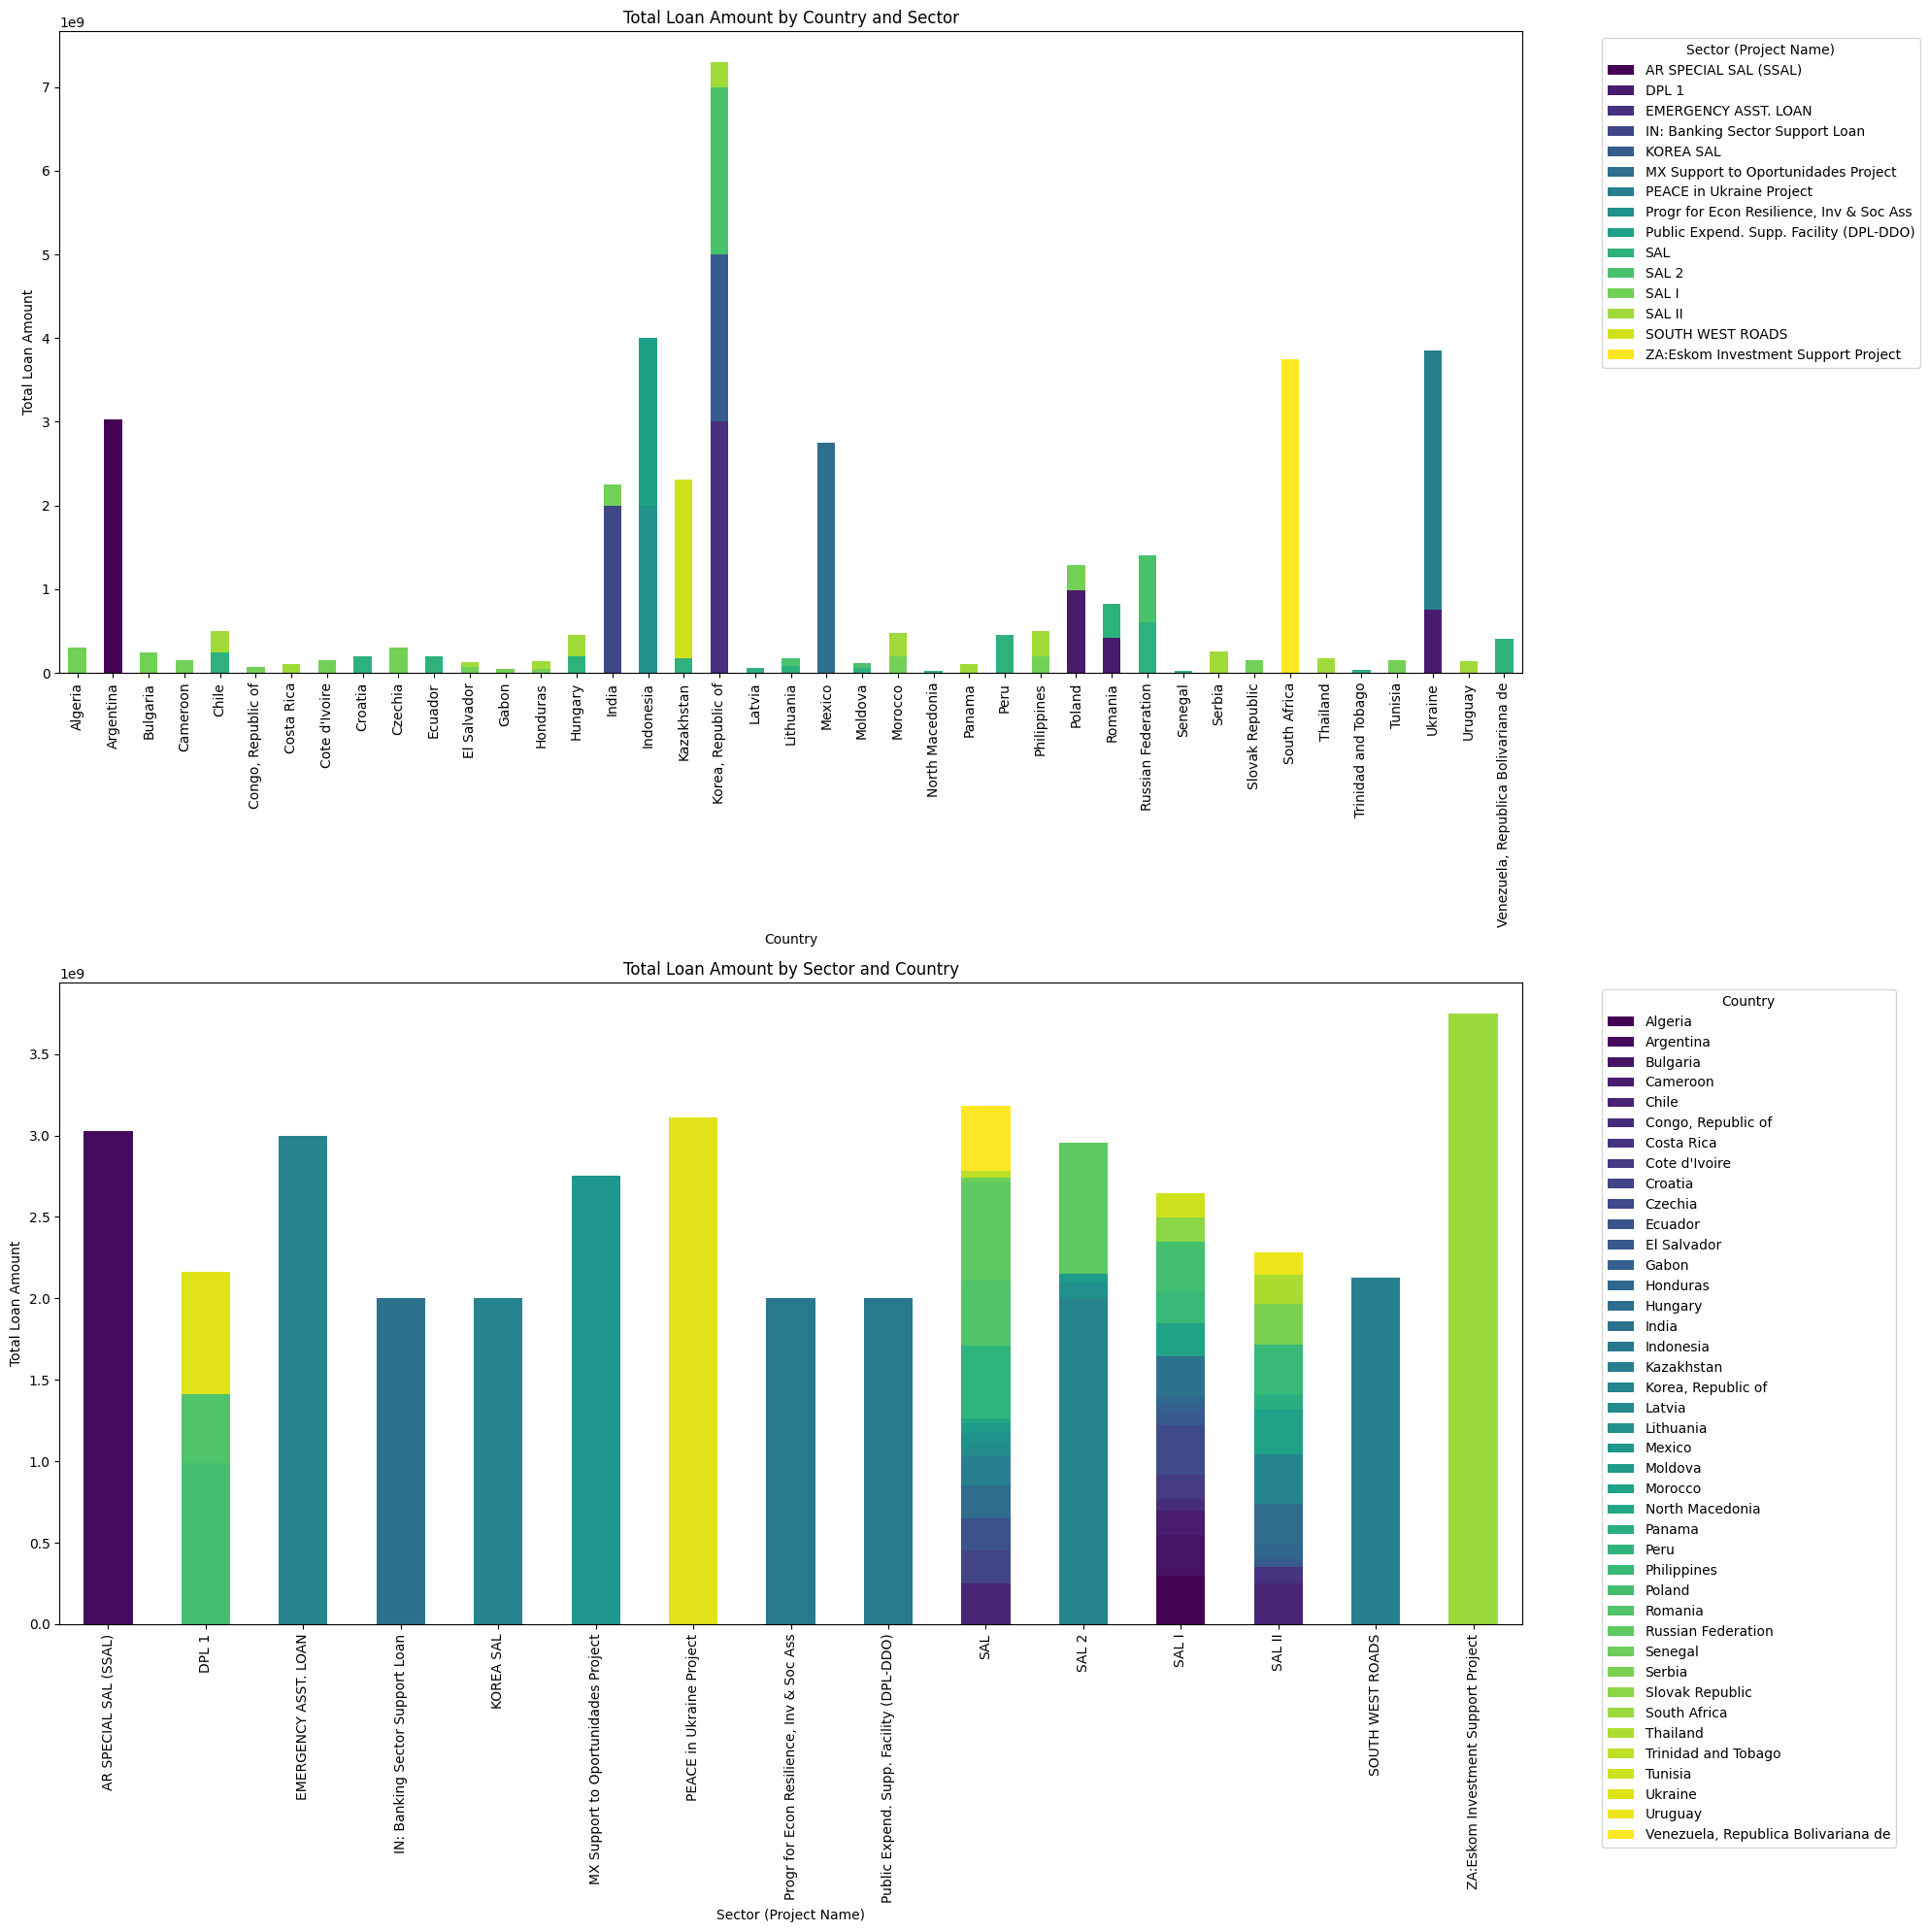

In [27]:
# Select the top 15 sectors by total loan amount
top_15_sectors = total_loan_amount_per_sector_country.groupby('Project Name')['Total Loan Amount'].sum().nlargest(15).index
top_15_data = total_loan_amount_per_sector_country[total_loan_amount_per_sector_country['Project Name'].isin(top_15_sectors)]

# Pivot the data for the stacked bar charts
pivot_table_country = top_15_data.pivot(index='Country', columns='Project Name', values='Total Loan Amount').fillna(0)
pivot_table_sector = top_15_data.pivot(index='Project Name', columns='Country', values='Total Loan Amount').fillna(0)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

# Stacked bar chart for total loan amount by country
pivot_table_country.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Total Loan Amount by Country and Sector')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Loan Amount')
axes[0].legend(title='Sector (Project Name)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Stacked bar chart for total loan amount by sector
pivot_table_sector.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Total Loan Amount by Sector and Country')
axes[1].set_xlabel('Sector (Project Name)')
axes[1].set_ylabel('Total Loan Amount')
axes[1].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Understanding the total loan amount, repaid amount, and due amount helps in assessing the financial health and performance of each sector.

In [28]:
# Calculate the total loan amount for each sector
total_loan_amount_per_sector = df.groupby('Project Name')['Original Principal Amount'].sum().reset_index()
total_loan_amount_per_sector.columns = ['Project Name', 'Total Loan Amount']

# Calculate the total repaid amount for each sector
total_repaid_amount_per_sector = df.groupby('Project Name')['Repaid to IBRD'].sum().reset_index()
total_repaid_amount_per_sector.columns = ['Project Name', 'Total Repaid Amount']

# Calculate the remaining due amount for each sector
total_due_amount_per_sector = df.groupby('Project Name')['Due to IBRD'].sum().reset_index()
total_due_amount_per_sector.columns = ['Project Name', 'Remaining Due Amount']

# Combine the calculations into a single DataFrame
sector_financials = pd.merge(total_loan_amount_per_sector, total_repaid_amount_per_sector, on='Project Name')
sector_financials = pd.merge(sector_financials, total_due_amount_per_sector, on='Project Name')

# Display the results
print(sector_financials.head(10))



                      Project Name  Total Loan Amount  Total Repaid Amount  \
0                   (DFC V) DIB IV        50000000.00          49565878.69   
1        (LKD) HIGHWAY SECTOR LOAN       250000000.00         141697499.33   
2                 (PIAUI)R.POVERTY        30000000.00          28707484.03   
3  *DUMMY FOR * BOSNIA-HERZEGOVINA       650000000.00         566913405.11   
4               *DUMMY FOR * CHINA       121447142.81                 0.00   
5            *DUMMY FOR * PAKISTAN       240000000.00                 0.00   
6         *DUMMY FOR * PHILIPPINES       100000000.00                 0.00   
7              *DUMMY FOR * RUSSIA       100000000.00                 0.00   
8             *DUMMY FOR * UKRAINE       100000000.00                 0.00   
9          *DUMMY FOR * YUGOSLAVIA      1867239432.30        1890331231.11   

   Remaining Due Amount  
0                  0.00  
1                  0.00  
2                  0.00  
3           53657562.03  
4          

By including the Original Principal Amount, Repaid to IBRD, and Remaining Due Amount, we provide a comprehensive overview of the loan lifecycle—how much was borrowed, how much has been repaid, and how much is still due.These metrics are key performance indicators for loan performance. They help in understanding the effectiveness of the loans, the repayment behavior of the sectors, and the financial risk associated with the remaining due amounts.

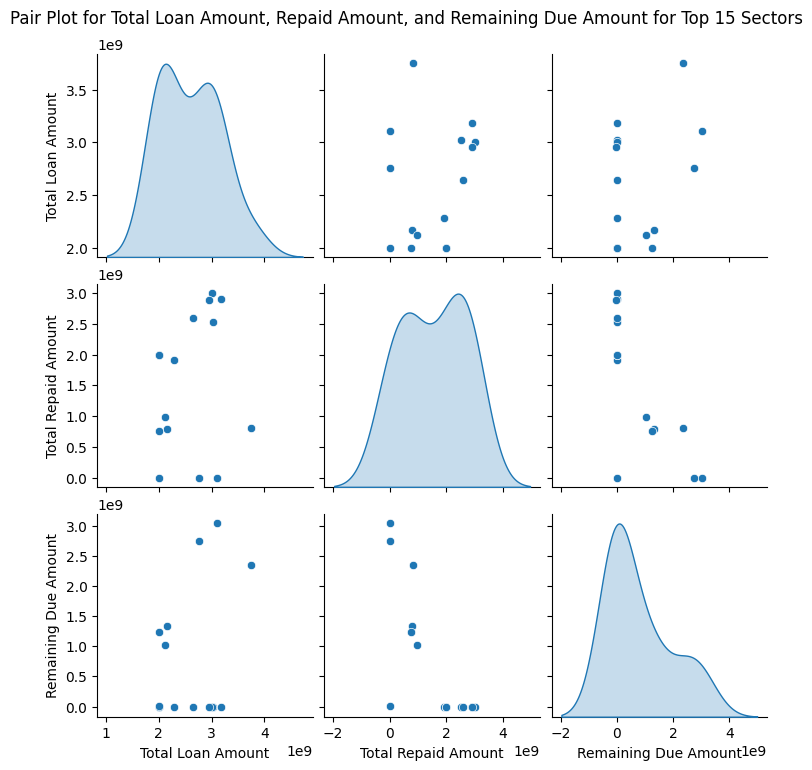

In [29]:
# Select the top 15 sectors based on the total loan amount
top_15_sectors = sector_financials.nlargest(15, 'Total Loan Amount')

# Plot pair plot
sns.pairplot(top_15_sectors, vars=['Total Loan Amount', 'Total Repaid Amount', 'Remaining Due Amount'], diag_kind='kde')
plt.suptitle('Pair Plot for Total Loan Amount, Repaid Amount, and Remaining Due Amount for Top 15 Sectors', y=1.02)
plt.show()

### The correlation matrix helps identify strong relationships, showing that higher repayment rates are associated with lower due rates, and reveals how larger loan sizes impact repayment and due rates across different sectors.Identifies which metrics are strongly correlated, helping to pinpoint key performance indicators that drive successful loan repayments.

Correlation Matrix:
                      Total Loan Amount  Total Repaid Amount  \
Total Loan Amount                  1.00                 0.20   
Total Repaid Amount                0.20                 1.00   
Remaining Due Amount               0.33                -0.75   
Repayment Rate                    -0.04                 0.95   
Due Rate                           0.16                -0.78   

                      Remaining Due Amount  Repayment Rate  Due Rate  
Total Loan Amount                     0.33           -0.04      0.16  
Total Repaid Amount                  -0.75            0.95     -0.78  
Remaining Due Amount                  1.00           -0.80      0.97  
Repayment Rate                       -0.80            1.00     -0.80  
Due Rate                              0.97           -0.80      1.00  


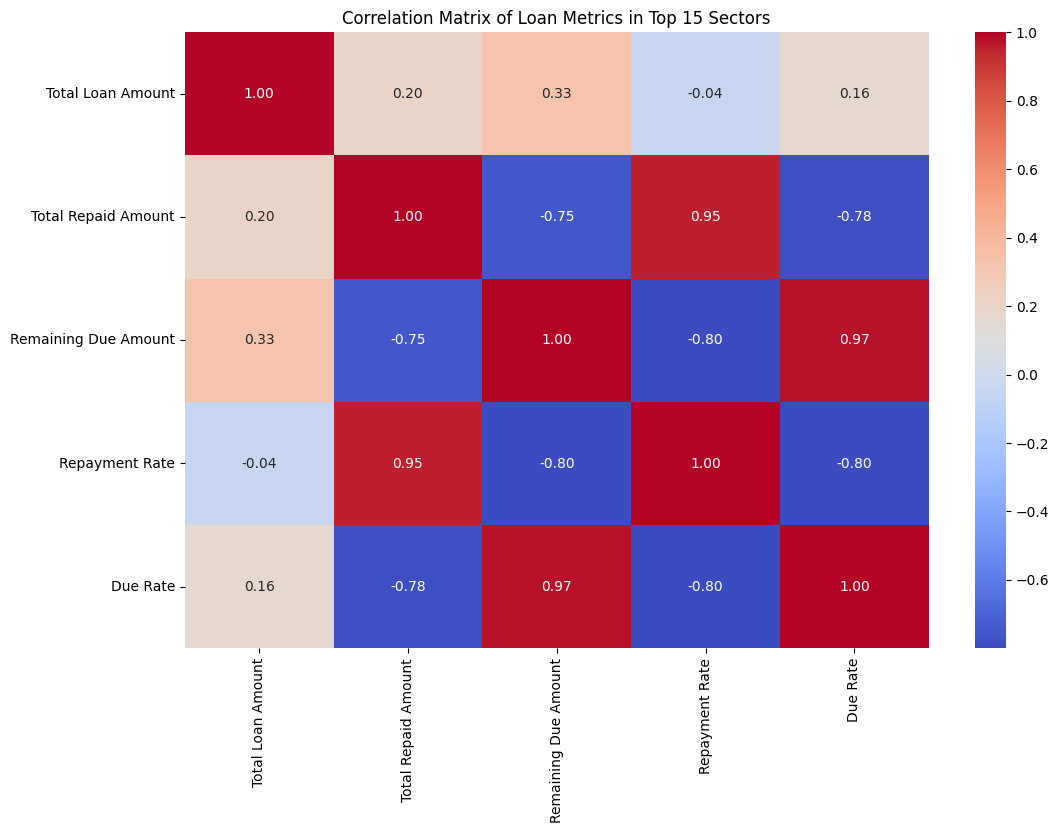

In [30]:
# Calculate the repayment rate and due rate for each sector
sector_financials['Repayment Rate'] = sector_financials['Total Repaid Amount'] / sector_financials['Total Loan Amount']
sector_financials['Due Rate'] = sector_financials['Remaining Due Amount'] / sector_financials['Total Loan Amount']

# Select the top 15 sectors based on the total loan amount
top_15_sectors = sector_financials.nlargest(15, 'Total Loan Amount')

# Select relevant columns for correlation analysis
correlation_columns = ['Total Loan Amount', 'Total Repaid Amount', 'Remaining Due Amount', 'Repayment Rate', 'Due Rate']

# Calculate the correlation matrix for the top 15 sectors
correlation_matrix = top_15_sectors[correlation_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Loan Metrics in Top 15 Sectors')
plt.show()


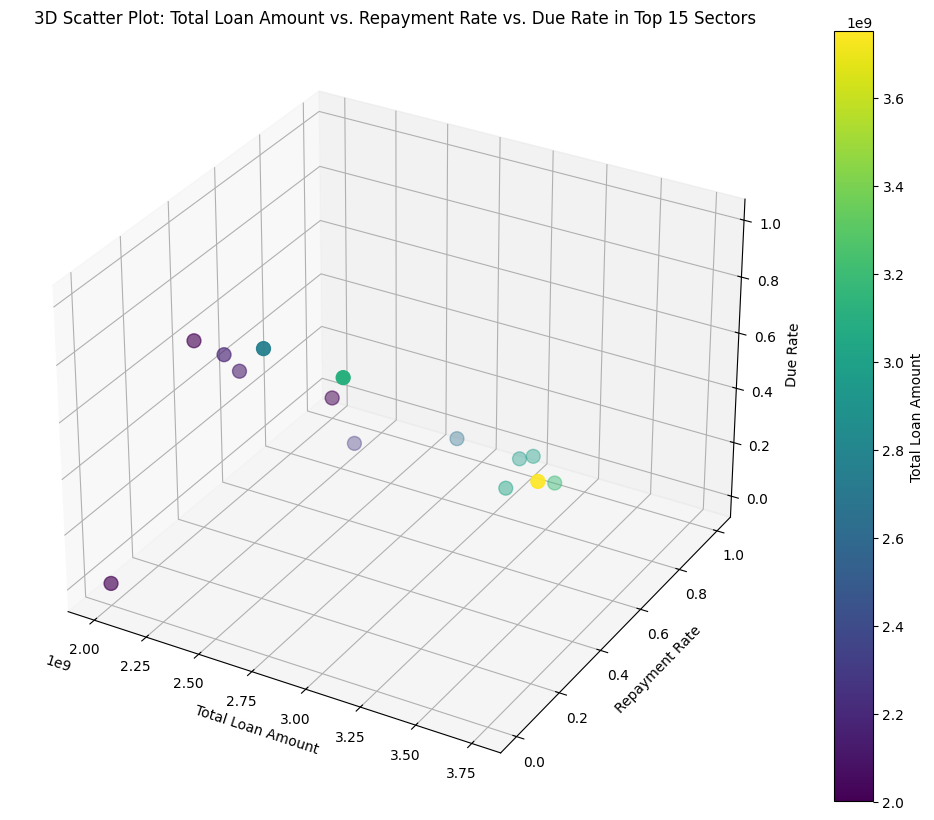

In [31]:
# Select the top 15 sectors based on the total loan amount
top_15_sectors = sector_financials.nlargest(15, 'Total Loan Amount')

# Plot 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(top_15_sectors['Total Loan Amount'], top_15_sectors['Repayment Rate'], top_15_sectors['Due Rate'],
                c=top_15_sectors['Total Loan Amount'], cmap='viridis', s=100)

# Labels
ax.set_title('3D Scatter Plot: Total Loan Amount vs. Repayment Rate vs. Due Rate in Top 15 Sectors')
ax.set_xlabel('Total Loan Amount')
ax.set_ylabel('Repayment Rate')
ax.set_zlabel('Due Rate')

# Legend
plt.colorbar(sc, ax=ax, label='Total Loan Amount')
plt.show()

### As we can see in the 3D scatter plot, there is a clear relationship between the total loan amount and the repayment rate. The plot demonstrates that as the total loan amount increases, the repayment rate also tends to increase. This suggests that sectors with higher loan amounts generally exhibit higher repayment rates, indicating a positive correlation between these two variables. Conversely, the due rate shows an inverse relationship with the total loan amount. As the total loan amount increases, the due rate decreases. This inverse proportionality implies that sectors with larger loans are more efficient in managing their dues, resulting in lower due rates. This analysis provides valuable insights into the financial dynamics of different sectors, highlighting how larger loan amounts are associated with better repayment performance and lower due rates.

### 5. Do the interest rates exhibit any obvious trends based on the borrowers’ geographic locations?

/tmp/ipykernel_4010/735317896.py:29: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x='Interest Rate', y='Country',hue='Region', data=interest_country, palette=rainbow_colors)


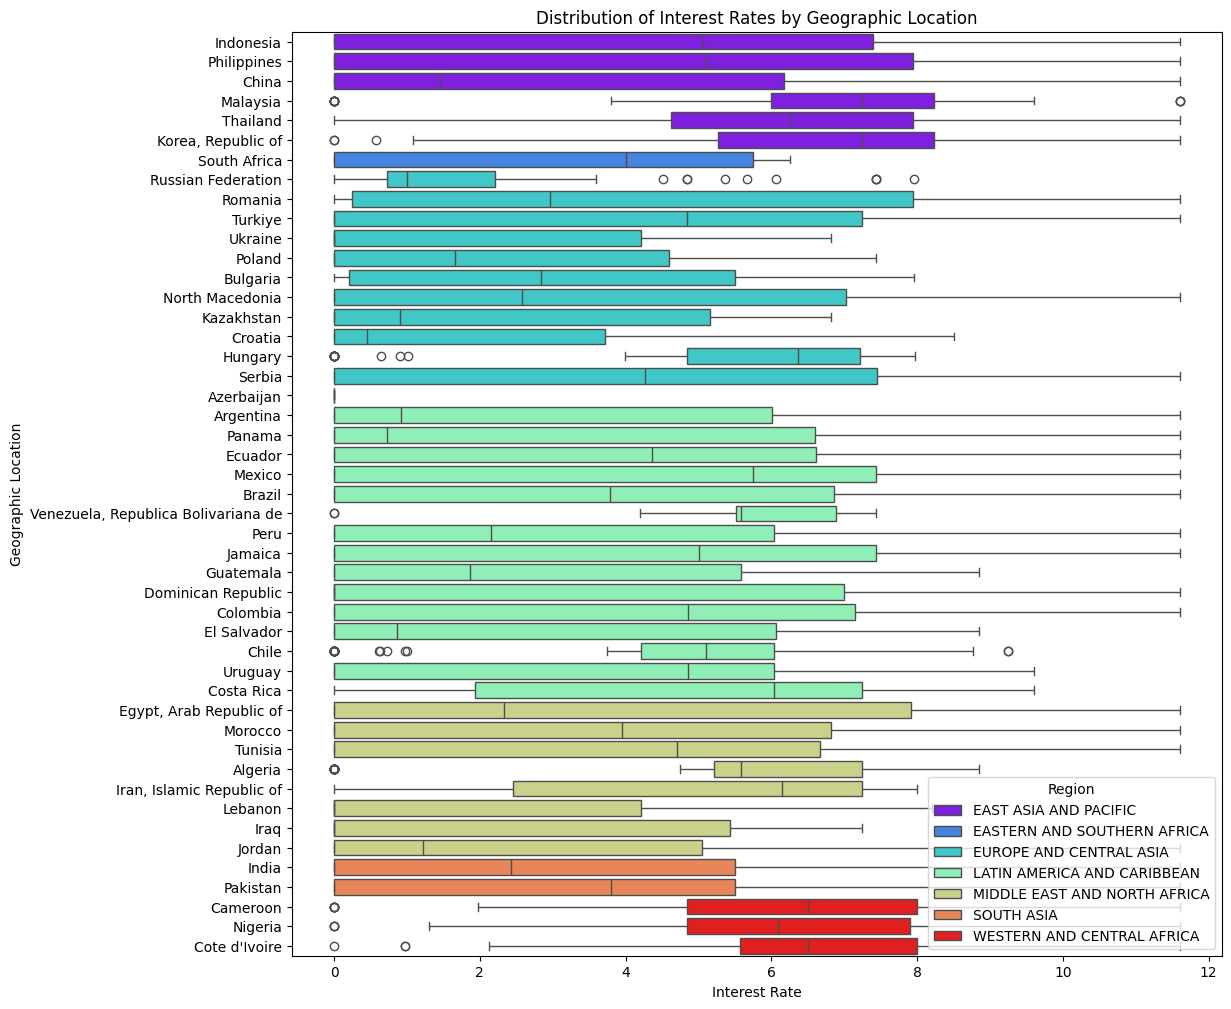

In [32]:
# filter out countries owed more than 1 billion

# the total loan of a country is the repaid amount plus the amount sold to third party
repaid_by_c = country_df['Repaid to IBRD'].sum()
third_party_by_c = country_df['Sold 3rd Party'].sum()
total_loans_by_c = repaid_by_c+ third_party_by_c

# convert to df, use billion as unit
total_loans_by_c= total_loans_by_c.reset_index()
total_loans_by_c.columns =  ['Country','Loan']
total_loans_by_c['Loan'] = total_loans_by_c['Loan']/ 1000000000

# filter out countries owed more than 1 billion
oneb_country = total_loans_by_c[total_loans_by_c['Loan']> 1]
oneb_country

# keep interest rate for oneb countries in df
oneb_df = df[df['Country'].isin(oneb_country['Country'])]
interest_country = oneb_df[['Country', 'Interest Rate','Region']]

# sort and put countries in the same region together
interest_country = interest_country.sort_values('Region')

# use rainbow colors palette
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(interest_country['Region'].unique())))

# Create a box plot
plt.figure(figsize=(12, 12))
sns.boxplot(x='Interest Rate', y='Country',hue='Region', data=interest_country, palette=rainbow_colors)
plt.title('Distribution of Interest Rates by Geographic Location')
plt.xlabel('Interest Rate')
plt.ylabel('Geographic Location')
plt.show()

### Step 4: Meeting Schedule 

We are all busy. You and your team should be working towards this project on a weekly basis. Share your proposed schedule below.

`--== Double-click and describe your project schedule below  ==--`

In [33]:
we are meeting everday at 11:30 am EDT

SyntaxError: invalid syntax (2355122231.py, line 1)